# Dos pous de barrera potencial finit com a model per un QD de CdSe

### Fem que les barreres de potencial siguin semblants a les que hi ha per la banda de conducció i per la banda de valència, fem un pou per cadascuna d'aquestes bandes. Aquest codi és molt senzill, no es té en compte la diferència entre les masses efectives.

In [61]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


''' Define Part '''

# Define the size of the QDs, the length of the quantum well
length_nm = 2.5                         
R_nm = length_nm/2
R_ua = R_nm*18.8973                       # Radius in atomic units, to use it in the position of |x|


# Difference for each band, the barriers for each finite well
well_c_eV = 1.39                          # Energy difference in eV
well_v_eV = 1.08
well_c = well_c_eV*0.0367493              # Hartrees
well_v = well_v_eV*0.0367493  


# Define potential for the conduction band
def getV_c(x):
    if (abs(x)<R_ua):
       potvalue = 0.0
    else:
       potvalue = well_c
    return potvalue

# Define potential for the valence band
def getV_v(x):
    if (abs(x)<R_ua):
       potvalue = 0.0
    else:
       potvalue = well_v
    return potvalue


# Define discretized Schrödinger equation for the conduction band
def Eq_c(n, h, x):
    F_c = np.zeros([n, n])
    for i in range(n):
        F_c[i,i] = -2*((h**2)*getV_c(x[i])+1)
        if i > 0:
            F_c[i,i-1] = 1
            if i < n-1:
                F_c[i,i+1] = 1
    return F_c

# Define discretized Schrödinger equation for the valence band
def Eq_v(n, h, x):
    F_v = np.zeros([n, n])
    for i in range(n):
        F_v[i,i] = -2 *((h**2)*getV_v(x[i])+1)
        if i > 0:
            F_v[i,i-1] = 1
            if i < n-1:
                F_v[i,i+1] = 1
    return F_v
    

In [114]:

''' Finite Element Method '''
# Calculation interval using the finite element method, the wave function ranges from -L/2 to L/2
L = R_ua*2*2              # Interval studied larger than the well width 
xlower = -L/2.0
xupper = L/2.0

# Discretization options
h = 0.3                       # Step size in space

# Create coordinates at which the solution will be calculated and grid size
x = np.arange(xlower,xupper+h,h)
npoints = len(x)
print("Using", npoints, "grid points.")


Using 316 grid points.


In [116]:

''' Schrödinger: Eigen values and eigen vectors '''
# Calculation of the Schrödinger equation and diagonalization
F_c = Eq_c(npoints, h, x)                                           # Conduction band
eigenValues_c, eigenVectors_c = np.linalg.eig(F_c)
F_v = Eq_v(npoints, h, x)                                           # Valance band
eigenValues_v, eigenVectors_v = np.linalg.eig(F_v)


# Sort results by eigenvalue
idx_c = eigenValues_c.argsort()[::-1]           # Conduction band               
w_c = eigenValues_c[idx_c]
vs_c = eigenVectors_c[:, idx_c]
idx_v = eigenValues_v.argsort()[::-1]           # Valance band
w_v = eigenValues_v[idx_v]
vs_v = eigenVectors_v[:, idx_v]


In [118]:

''' Energy levels '''
# Calculation of energy levels
E_c = -w_c/(2.0*h**2)          # Hartrees
E_v = -w_v/(2.0*h**2)
E_c = E_c*27.2114
E_v = E_v*27.2114

# Print the first three energy levels
print("\nConduction band energies:")
for k in range(3):
    print(f"n={k}, E_c = {E_c[k]:.5f}")
print("\nValence band energies:")
for k in range(3):
    print(f"n={k}, E_v = {E_v[k]:.5f}")
    


Conduction band energies:
n=0, E_c = 0.04657
n=1, E_c = 0.18547
n=2, E_c = 0.41399

Valence band energies:
n=0, E_v = 0.04512
n=1, E_v = 0.17939
n=2, E_v = 0.39894


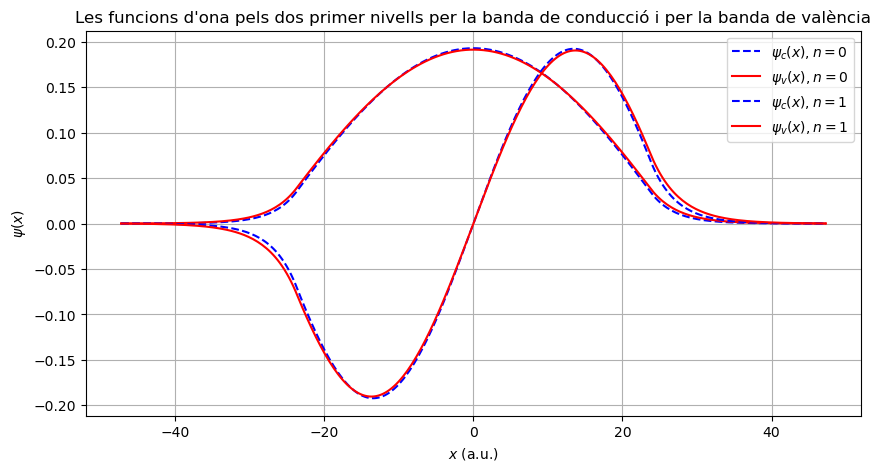

In [120]:

''' Wave functions '''
# Initialize matrices to store wave functions
psi_c = np.zeros((npoints, len(w_c)))             # Conduction band      
psi_v = np.zeros((npoints, len(w_v)))             # Valance band


# Normalize the wave functions
for k in range(len(w_c)):
    psi_c[:, k] = vs_c[:, k]  
    integral_c = h * np.dot(psi_c[:, k], psi_c[:, k])
    psi_c[:, k] /= integral_c**0.5  

for k in range(len(w_v)):
    psi_v[:, k] = vs_v[:, k]  
    integral_v = h * np.dot(psi_v[:, k], psi_v[:, k])
    psi_v[:, k] /= integral_v**0.5  


print( )

# Plot the wave functions of the first two levels
plt.figure(figsize=(10, 5))

for k in range(2):  
    plt.plot(x, psi_c[:, k], label=rf'$\psi_c(x), n={k}$', linestyle='dashed', color='blue')
    plt.plot(x, psi_v[:, k], label=rf'$\psi_v(x), n={k}$', linestyle='solid', color='red')

plt.title("Les funcions d'ona pels dos primer nivells per la banda de conducció i per la banda de valència")
plt.xlabel(r'$x$ (a.u.)')
plt.ylabel(r'$\psi(x)$')
plt.legend()
plt.grid()
plt.show()


S’utilitzen barreres de potencial similars a les diferències de banda d’un quantum dot de CdSe. S’empra un model de pou amb barrera de potencial finita tant per a la banda de conducció com per a la de valència, en una versió simplificada, ja que la massa efectiva és la mateixa per als forats i els electrons. Observem que, a mesura que la barrera de potencial augmenta, els electrons estan més confinats i una part menor de la funció d’ona s’estén fora del pou.


In [87]:
''' EXTRA '''
# Per veure quina llum emitria un QD d'aquestes caracteristiques
E_bulk = 1.74
sum_E = E_v[0] + E_c[0] + E_bulk
wavelength = 1240 / sum_E
print(f"El fotó emès per un QD de CdSe amb aquestes característiques tindria una longitud d'ona de {wavelength:.2f}nm, és a dir, un fotó d'energia {sum_E:.2f}eV.")

El fotó emès per un QD de CdSe amb aquestes característiques tindria una longitud d'ona de 676.97nm, és a dir, un fotó d'energia 1.83eV.
